In [1]:
import model_loader
import pipeline
from PIL import Image
from transformers import CLIPTokenizer
import torch

DEVICE = "cpu"
ALLOW_CUDA = False

if torch.cuda.is_available() and ALLOW_CUDA:
    DEVICE = "cuda"

print(f"Using device: {DEVICE}")

/Users/rishabalagharu/.pyenv/versions/3.12.7/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Using device: cpu


In [2]:
tokenizer = CLIPTokenizer("../data/vocab.json", merges_file="../data/merges.txt")

model_file = "../data/v1-5-pruned-emaonly.ckpt"
models = model_loader.preload_models_from_standard_weights(model_file, DEVICE)

In [ ]:
# Text-to-Image
# prompt = "A cat stretching on the floor, highly detailed, ultra sharp, cinematic, 8k resolution"
# prompt = "A dog eating from a bowl of dog food, highly detailed, ultra sharp, cinematic, 8k resolution"
prompt = "A man playing tennis with his friend, highly detailed, ultra sharp, cinematic, 8k resolution"
uncond_prompt = ""  # You can use it as a negative prompt
do_cfg = True
cfg_scale = 7

# Image-to-Image
input_image = None
image_path = "../images/dog.jpg"

# Comment out for text-to-image or image-to-image
# input_image = Image.open(image_path)
# prompt = "A dog wearing sunglasses, highly detailed, ultra sharp, cinematic, 8k resolution"


#  Set how much noise to add to the input image.
# More noise (strength ~ 1) means that the output will be further from the input image.
# Less noise (strength ~ 0) means that the output will be closer to the input image.

strength = 0.9  # For image-to-image, it will start at the strength * 1000 timestep instead of 1000

sampler = "ddpm"
num_inference_steps = 50
seed = 42

100%|██████████| 30/30 [03:15<00:00,  6.50s/it]


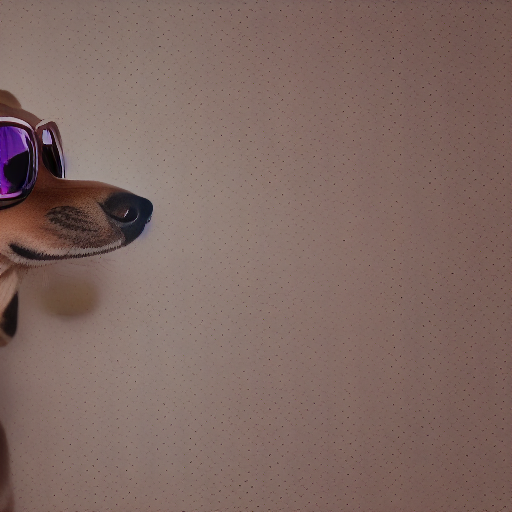

In [10]:
output_image = pipeline.generate(
    prompt=prompt,
    uncond_prompt=uncond_prompt,
    input_image=input_image,
    strength=strength,
    do_cfg=do_cfg,
    cfg_scale=cfg_scale,
    sampler_name=sampler,
    n_inference_steps=num_inference_steps,
    seed=seed,
    models=models,
    device=DEVICE,
    idle_device="cpu",
    tokenizer=tokenizer,
)

Image.fromarray(output_image)